# KNN Lab!

### Anthony Higareda

In this lab you will be building your own KNN implementation and comparing it to SKLearn's KNN implementation. You will then compare KNN to other machine learning algorithms.

**NOTE: IF YOU MAKE CHANGES TO AN EXTERNAL PYTHON CLASS, TO MAKE THOSE CHANGES APPEAR IN THE NOTEBOOK WHEN YOU RUN YOUR CODE YOU MUST RESTART THE KERNEL THEN REIMPORT THE CLASS**

In [1]:
#imports!
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import test_knn #be sure the test_knn class is in the same directory as this notebook
from knn import KNN #be sure the knn class is in the same directory as this notebook
from sklearn.metrics import accuracy_score

#some functionality in the KNeighbors causes a warning to appear 
#doing the below will suppress these warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Part 1 - Visualize the Data

In [2]:
#data import
iris = load_iris() #this is the same data we used in class, but from another source
# Convert the Bunch from load_iris() to a pandas DataFrame
iris_data = np.c_[iris.data, iris.target]
col_names = np.append(iris.feature_names, ["target"])
iris_df = pd.DataFrame(data = iris_data, columns = col_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In the following cell, use Matplotlib to make scatter plots of different feature pairings, coloring the points by their "targets" (labels). When you submit, show the plot that you think best differentiates the classes. Alternatively, you can recreate the Seaborn pairplot that we created for this data in the supervized_learning.ipynb notebook, and comment on which subplot best illustrates the separation between the classes.

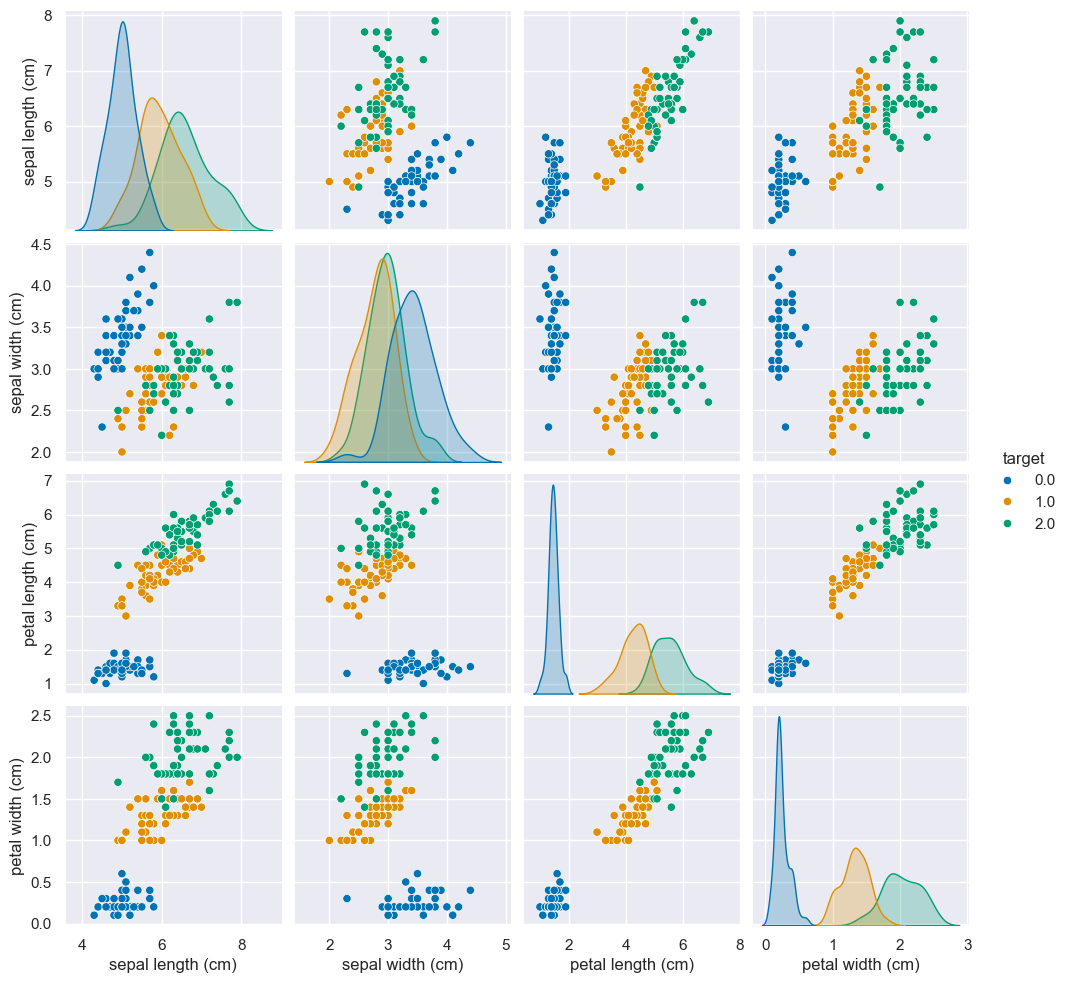

In [3]:
sns.pairplot(iris_df, hue="target", palette="colorblind")
plt.show()

From this Seaborn pairplot, it appears that petal length and petal width plots have the greatest separation between the different types of iris flowers.

# Part 2 - Implementing kNN

In the knn.py class (which needs to be in the same directory as this notebook), implement the predict_loop() method. If you need a refresher on Python objects, go check out the Lecture 4 slides.

In the knn.py class, \_\_init\_\_() and fit() are already implemented for you. \_\_init\_\_() is a constructor, and creates an instance variable self.k (the "k" in KNN). Fit adds two more instance variables self.X and self.y (which are the training data and the labels, respectively).

Assuming your predict_loop() implementation is correct, the following cell should run without error.

**Hint:** The return type expected from predict_loop() is a numpy array. If you used a Python list (or some other data structure) to keep track of your output labels, simply call np.asarray() on that list when you return it.

In [4]:
test = test_knn.TestKNN()
test.test_blob_classification_loop()
test.test_iris_classification_loop()

Blob loop test complete!
Iris loop test complete!


# Part 3 - Training a model

In the cell below, use the train-test split given to train the model with k = 1, then **print out the accuracy of your model** (you may use the accuracy_score() method imported above to do this). Note that training our class behaves exactly like the previous models we have trained before (1: create the model object, 2: "fit" the model to the data, 3: predict the labels from the test data - note that our prediction method is predict_loop(), not just predict()).

In [7]:
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, stratify = iris.target,
                                                    random_state = 0)

knn_iris_test = KNN(1)
knn_iris_test.fit(train_X, train_y)
knn_y_pred = knn_iris_test.predict_loop(test_X)
print(accuracy_score(test_y, knn_y_pred))

0.9736842105263158


Your accuracy should be pretty good - but can you do better with different values of k? In the cell below, calculate and plot accuracies for k ranging between 1 and 40. Keep the same train/test/split as above.

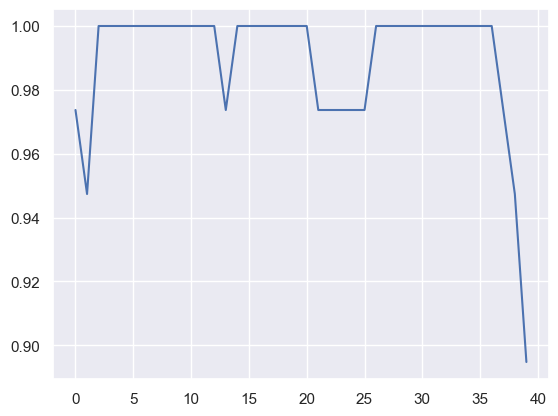

In [26]:
# testing with k values 1-40
def test_my_knn(X_train, y_train, X_test, y_test, k):
    my_knn = KNN(k)
    my_knn.fit(X_train, y_train)
    my_knn_y_pred = my_knn.predict_loop(X_test)
    return accuracy_score(y_test, my_knn_y_pred)

accuracies = []
for i in range (40):
    accuracies.append(test_my_knn(train_X, train_y, test_X, test_y, i + 1))

plt.plot(accuracies)
plt.show()

In the cell below, answer the question - why does accuracy start to drop when you have a k around 40?

Because the data set is rather small, when k gets to 40, the closest neighbors to a point on the outskirts of a large cluster (but not necessarily an outlier) are more likely to have approximately a 50/50 split between their classes from reaching out too far past the boundaries of its own class.

# Part 4 - Using a prebuilt model

Lets now compare our KNN model with SKLearn's KNN model. The cell below contains a function that will run SKLearn's KNN model on an input data set. Use it to recreate the plot from part 3. **Answer the questions:** Do the two methods get a consistent output? Is that expected for kNN?

**Answer**<br />
The two methods have very similar output, but the accuracy at K = 27 drops when using SKLearn's KNN method. They should have the same output if both methods are using unweighted distance voting, so this is surprising. It could be that at K=27, a point has the same number of neighbors from different classes, and it just happens that the "most common neighbor class" logic handles 50/50 splits differently between the two methods and mine just happened to get lucky with that case.

In [6]:
def run_knn(X_train, y_train, X_test, y_test, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    return accuracy_score(pred, y_test)

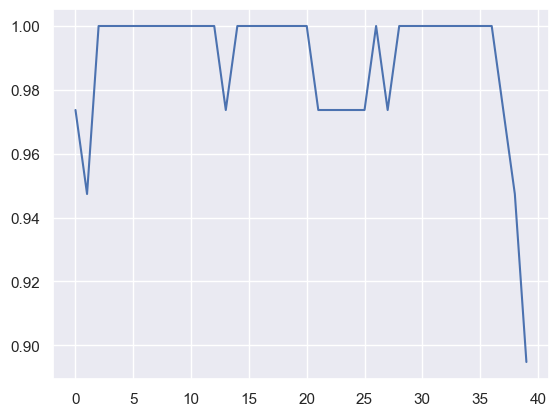

In [19]:
# testing with k values 1-40
skl_accuracies = []
for i in range (40):
    skl_accuracies.append(run_knn(train_X, train_y, test_X, test_y, i + 1))

plt.plot(skl_accuracies)
plt.show()

# Part 5 - Benchmarking

In the cell below, benchmark (using %%timeit) the time it takes to create/fit/predict our kNN implmentation on the iris data with k = 20

In [28]:
%%timeit
test_my_knn(train_X, train_y, test_X, test_y, 20)

19 ms ± 226 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In the cell below, benchmark the time it takes to train SKLearn's kNN implementation on the iris data with k = 20. Is there a large difference between the two methods?

In [23]:
%%timeit
run_knn(train_X, train_y, test_X, test_y, 20)

2.39 ms ± 201 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


There is a significant difference between the two methods. My KNN method took approximately 19 ms to run, while the SKLearn method only took about 2.4 ms.